# Business Case: Scaler Clustering
## Grouping learners based on backgrounds for more personalized Learning...
### Context
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

Scaler, as an emerging tech-versity, endeavors to provide world-class education in computer science & data science domains.A significant challenge for Scaler is understanding the diverse backgrounds of its learners, especially in terms of their current roles, companies, and experience.




>**Problem Type:** `Unsupervised Learning (Clustering)`

### Problem Statement:

 **Clustering similar learners helps in customizing the learning experience, thereby
increasing retention and satisfaction.**

As a data scientist with the analytics vertical of Scaler, focusing on `profiling the best companies and job positions` to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to `cluster them on the basis of their job profile, company, and other features`. Ideally, these clusters should have similar characteristics.

 ### How we do it:
 - Analyzing the vast data of learners can uncover patterns in their professional
 backgrounds and preferences. This allows Scaler to make tailored content
 recommendations and provide specialized mentorship.
 - By leveraging data science and unsupervised learning, particularly clustering
 techniques, Scaler can group learners with similar profiles, aiding in delivering a
 more personalized learning journey.

### Resources: 
- `Unnamed 0` - Index of the dataset
- `Email_hash` - Anonymised Personal Identifiable Information (PII)
- `Company_hash` - This represents an anonymized identifier for the company, which is the current employer of the learner.
- `orgyear` -  Represents the year the learner began employment at the current company.
- `CTC` - Current CTC
- `Job_position` - Job profile in the company
- `CTC_updated_year` - Year in which CTC got updated (Yearly increments, Promotions)

### Concepts Used: 
- PCA, Tsne, Hypothesis testing, correlation(pearson/spearman), EDA, plotly, kmeans, kmean++, DBSCAN, hirarchial.
- Note: Above concepts are currently assumptions, might add/remove later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
original_data= pd.read_csv("scaler_clustering.csv",index_col= 0) # setting the first column as the index
df = original_data.copy(deep = True) # creating deep copy to play with data while keeping original intact.
df.head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


## Basic understading of the Dataset
- shape (No. of rows and columns)
- Data types (Numeric, Categorical, date/time)
- Nulls, duplicates, outliers, inconsistent formats
- Summarizing the data understanding

In [3]:
# data shape
print(f"Rows in the dataset: {df.shape[0]}")
print(f"Columns in the dataset: {df.shape[1]}")

Rows in the dataset: 205843
Columns in the dataset: 6


In [4]:
# verify column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153279 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [5]:
# Find duplicate rows
print("Duplicated records: ",df.duplicated().sum())

Duplicated records:  34


In [6]:
df.drop_duplicates(inplace=True)
print("Duplicated records: ",df.duplicated().sum())

Duplicated records:  0


In [7]:
# Null values
print("Null count in each column")
df.isna().sum()

Null count in each column


company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

In [8]:
# descritive statistics of numerical columns
df.describe()

,orgyear,ctc,ctc_updated_year
count,205723.000000,2.058090e+05,205809.000000
mean,2014.882264,2.271862e+06,2019.628272
std,63.576352,1.180187e+07,1.325187
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [9]:
def column_summary(data, col, uni_len=13):
    """
    Column Summarizer Utility
    
    Displays key statistics for column in the DataFrame:
    - Column name and data type
    - Null value count and percentage
    - Number of unique values
    - Value counts (if column is categorical or has unique values <= uni_lens)
    
    Parameters:
    - data: Pandas DataFrame
    - col: Column name (string)
    - uni_lens: Threshold for displaying value counts (int)
    """
    
    print("--" * 40)
    print(f"🔹 Column Name       : {col}")
    print(f"🔸 Data Type         : {data[col].dtype}")
    
    total_null = data[col].isnull().sum()
    null_percent = (total_null / len(data)) * 100
    print(f"❌ Total Null Values : {total_null} ({null_percent:.2f}%)")
    
    unique_vals = data[col].nunique()
    print(f"🔢 Unique Values     : {unique_vals}")
    
    # Display unique values and value counts if categorical or low cardinality
    if data[col].dtype in ('object', 'category') and unique_vals < uni_len:
        print(f"\n📊 Value Counts:\n{data[col].value_counts(dropna=False)}")

    
    # Display range (min - max) if the col is Numerical
    if data[col].dtype in ('int64', 'float64'):
        print(f"📏 Range             : {data[col].min()} - {data[col].max()}.")
        print(f"📊 Average           : {np.round(data[col].mean(),2)}")
        
    
    print("--" * 40 + "\n")


# Apply it to all columns
for col in df.columns:
    column_summary(df, col, uni_len=10)


--------------------------------------------------------------------------------
🔹 Column Name       : company_hash
🔸 Data Type         : object
❌ Total Null Values : 44 (0.02%)
🔢 Unique Values     : 37299
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
🔹 Column Name       : email_hash
🔸 Data Type         : object
❌ Total Null Values : 0 (0.00%)
🔢 Unique Values     : 153443
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
🔹 Column Name       : orgyear
🔸 Data Type         : float64
❌ Total Null Values : 86 (0.04%)
🔢 Unique Values     : 77
📏 Range             : 0.0 - 20165.0.
📊 Average           : 2014.88
--------------------------------------------------------------------------------

------------------------------------------------------------------------------

### Summarizing the data understanding:
- `Dataset`: 205843 Rows and 6 columns
- `Columns`: 3 Numerical(2 date), 3 categorical
- `Unique Learners`: 153443 Learners (Assuming unique email for each learner)
    - Need to remove the repeated email id by summing up experience and keeping the latest one
- `Missing values`: company hash(0.02%), org_year(0.04%) - Easily removable, job_position(25.53%) - Analysis and cure
- `Notes`: When we check the range there are anomolies
    - `ctc` = 2 (May be 2 lacs) | `ctc` = 1,00,01,50,000 (100crs? are you serious?)
    - `orgyear` == 0(Did he joined right after his birth or what :D, `orgyear` == 20165(immortal :o))

## Data Cleaning
- Analying importance and treating null values accordingly
- Fixing data entry issues - casing/similar meaning names

In [10]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52548
ctc_updated_year        0
dtype: int64

- Removing the null values that are less than 1% percent - You might get a doubt that they can be freshers, as ctc_updated is not null there are no freshers in the dataset.
- Just in case if i am wrong then for fresher company and orgyear and ctc_updated_year and job_position should be null.
- we can try with features with null values

In [11]:
fresher_count= df[(df["company_hash"].isna()) & (df['orgyear'].isna())]
fresher_count

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year


- By the definition of freshers we do not have them in our dataset

In [12]:
# removing the null values that are less than 1% percent

df = df.dropna(subset= ['company_hash', 'orgyear'])
df.shape

(205679, 6)

In [13]:
# iam losing 110 students out of 2,05,843.

original_data['email_hash'].nunique() - df['email_hash'].nunique()

110

In [14]:
df['job_position'].nunique()

1016

In [15]:
# Cleaning jobposition - 1/4th data is null, 1016 unique values

df['job_position'] = df['job_position'].str.lower()
df['job_position'].nunique()

943

In [16]:
df['job_position'].value_counts().head()

job_position
backend engineer          43532
fullstack engineer        25965
other                     18058
frontend engineer         10412
engineering leadership     6867
Name: count, dtype: int64

- even though the cardinality(unique names) slightly decreased (-73) but there is lot of similar names in the column.
- For now let's ignore and foucs time on next steps.

In [17]:
df[df['job_position'].isna()].head()

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
8,utqoxontzn ojontbo,e245da546bf50eba09cb7c9976926bd56557d1ac9a17fb...,2020.0,450000,NaN,2019.0
9,xrbhd,b2dc928f4c22a9860b4a427efb8ab761e1ce0015fba1a5...,2019.0,360000,NaN,2019.0
12,mvqwrvjo wgqugqvnt mvzpxzs,7f24d2f5171ea469482a9966832237bc023678883ecd0c...,2020.0,800000,NaN,2020.0
17,puxn,26b502eb6439ac80bd618a6f7c2b1c640b84c1e64c472c...,2020.0,1400000,NaN,2019.0
18,mvlvl exzotqc,62d2e04b44c8bf2f6ec15d5b4c259c06199f598dc51816...,2018.0,100000,NaN,2021.0


### Trying different Ideas
- Length of data and Unique learner are different (52346 rows has repeated emails)
- Analyzers learner that are reapeated

In [18]:
df['email_hash'].nunique()

153333

In [19]:
# calculate the difference 

df.shape[0] - df['email_hash'].nunique()

52346

In [20]:
df['email_hash'].value_counts()[df['email_hash'].value_counts() > 1].head()

email_hash
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b    10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378     9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c     9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee     9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065     8
Name: count, dtype: int64

In [21]:
# let's experiment with top values 
df[df['email_hash'] == "bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b"]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
24129,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,NaN,2020.0
46038,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,support engineer,2020.0
72415,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,other,2020.0
103145,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,fullstack engineer,2020.0
118076,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,720000,data analyst,2020.0
121825,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,other,2019.0
124840,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,support engineer,2019.0
145021,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,fullstack engineer,2019.0
153402,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,devops engineer,2019.0
160472,oxej ntwyzgrgsxto rxbxnta,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,2018.0,660000,NaN,2019.0


- After trying with multiple emails i have observed that orgyear is same, org is same, but different job_positions, 1 - 2 year difference in ctc_updated_year
- We can group the dataset based on email and work on that dataset

In [22]:
agg_func= {
    "company_hash" : 'first',
    "orgyear" : 'min',
    'ctc' : 'max', # mostly next org salary is based on previous org salary
    'job_position': lambda x: ', '.join(set(x.dropna())), # experimenting
    'ctc_updated_year': 'max'
}

In [23]:
agg_df= df.groupby(by=['email_hash']).agg(agg_func).reset_index()
agg_df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,backend engineer,2019.0
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,backend engineer,2020.0
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,fullstack engineer,2019.0
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004.0,2000000,fullstack engineer,2021.0
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,,2018.0


In [24]:
df['job_position'].nunique()

943

In [25]:
agg_df['job_position'].nunique()

1855

In [26]:
agg_df.isna().sum()

email_hash          0
company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
dtype: int64

Observations:
- Even though job_position null values has been drastically came to 0(Warning) but cardinality has been increased
- The job_position which has null init after aggregating has converted to empty string "".
- Since those are names they won't create much value but a fix dividing into Tech and non tech can help to solve cardinality issue.

In [27]:
df['job_position'].isna().sum()

np.int64(52493)

In [28]:
df['job_position'].value_counts().tail()

job_position
data/product engineer           1
applied scientist               1
member technical staff iii      1
web / ui designer               1
software engineer, associate    1
Name: count, dtype: int64

In [29]:
# create a function to classify tech and non tech
# Conditions: 1. has specific key words ['data', 'engineer', 'developer', 'programmer', 'analyst', 'software', 'scientist', 'it', 'technology']
# but engineer can also include mechanical or data can include data entry so let's check is it really there or not

In [30]:
matching_rows= df[df['job_position'].str.contains("engineer", na= False)]
matching_rows['job_position'].value_counts()

job_position
backend engineer                           43532
fullstack engineer                         25965
frontend engineer                          10412
engineering leadership                      6867
qa engineer                                 6584
                                           ...  
software engineer l2                           1
web engineer                                   1
software engineer  - programmer analyst        1
senior database engineer                       1
principal application engineer                 1
Name: count, Length: 271, dtype: int64

In [31]:
df[df['job_position'].str.contains("entry", na= False)]

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
42350,zgn vuurxwvmrt vwwghzn,75558f58237feaf5911aedcfd988895bb42c94be3605d2...,2015.0,10000,some data entry operator like some copy's writ...,2021.0
113812,sga qtltwnta vuurxvzwto,c2ee1ee5174181e8c38b6ca1bd8c811880525d56805c33...,2013.0,100000000,data entry,2021.0


- There are no non tech people who named as engineers
- There are just two learners with non tech data roles

In [32]:
# CREATE A FUNCTION THAT CLASSIFIES TECH AND NON TECH PEOPLE

tech_key_words= ['engineer', 'developer', 'programmer', 'analyst', 'software', 'scientist', 'it', 'technology']

agg_df["job_group"]= agg_df['job_position'].apply(
    lambda x: "tech" if any(keyword in str(x) for keyword in tech_key_words)
    else "unknown" if str(x) == ""
    else "non_tech"
)

In [33]:
agg_df["job_group"].value_counts()

job_group
tech        109788
non_tech     23357
unknown      20188
Name: count, dtype: int64

In [34]:
agg_df.isna().sum()

email_hash          0
company_hash        0
orgyear             0
ctc                 0
job_position        0
ctc_updated_year    0
job_group           0
dtype: int64

In [35]:
agg_df.shape

(153333, 7)

In [36]:
agg_df['job_position'].value_counts().head()

job_position
backend engineer      33761
                      20188
fullstack engineer    18885
other                 14166
frontend engineer      8601
Name: count, dtype: int64

- The black job_position is an empty string converted from null value by join function when aggregating the dataset.

In [37]:
agg_df.head()

,email_hash,company_hash,orgyear,ctc,job_position,ctc_updated_year,job_group
0,00003288036a44374976948c327f246fdbdf0778546904...,bxwqgogen,2012.0,3500000,backend engineer,2019.0,tech
1,0000aaa0e6b61f7636af1954b43d294484cd151c9b3cf6...,nqsn axsxnvr,2013.0,250000,backend engineer,2020.0,tech
2,0000d58fbc18012bf6fa2605a7b0357d126ee69bc41032...,gunhb,2021.0,1300000,fullstack engineer,2019.0,tech
3,000120d0c8aa304fcf12ab4b85e21feb80a342cfea03d4...,bxwqgotbx wgqugqvnxgz,2004.0,2000000,fullstack engineer,2021.0,tech
4,00014d71a389170e668ba96ae8e1f9d991591acc899025...,fvrbvqn rvmo,2009.0,3400000,,2018.0,unknown


### Summary of Data Cleaning
- Removed null values that are less than 0.05%
- Reduced cardinality of job_position
- Grouped data based on email(Learners)
- classified tech_non_tech based on keywords in job_position
- Null values are converted into unknown in tech_non_tech column
  
Detailed description under the cell that has been work done.

## Report Generation using Generative AI (OpenAI, Gemini, ChatGPT)

In [38]:
import pandas as pd
import numpy as np

def get_company_salary_summary(df: pd.DataFrame) -> str:
    """
    Generate a comprehensive summary report of employee/company salary dataset.

    Parameters
    ----------
    df : pd.DataFrame
        Expected columns:
        - 'company_hash', 'email_hash', 'orgyear', 'ctc',
          'job_position', 'ctc_updated_year', 'job_group'

    Returns
    -------
    str
        A formatted multi-line string containing comprehensive salary dataset statistics.
    """

    # --- Basic Stats ---
    total_records = len(df)
    unique_companies = df["company_hash"].nunique()
    unique_people = df["email_hash"].nunique()
    unique_positions = df["job_position"].nunique()

    tech_count = (df["job_group"].str.lower() == "tech").sum()
    non_tech_count = (df["job_group"].str.lower() == "non_tech").sum()
    unknown_count = (df["job_group"].str.lower() == "unknown").sum()

    # --- CTC Statistics ---
    ctc_data = df["ctc"].dropna()
    ctc_avg = ctc_data.mean()
    ctc_median = ctc_data.median()
    ctc_min = ctc_data.min()
    ctc_max = ctc_data.max()
    ctc_25th = ctc_data.quantile(0.25)
    ctc_75th = ctc_data.quantile(0.75)

    # --- Org Year Analysis ---
    orgyear_stats = df.groupby("orgyear").agg(
        count=("email_hash", "nunique"),
        avg_ctc=("ctc", "mean")
    ).reset_index()

    # --- CTC Updated Year Analysis ---
    updateyear_stats = df.groupby("ctc_updated_year").agg(
        count=("email_hash", "nunique"),
        avg_ctc=("ctc", "mean")
    ).reset_index()

    # --- Job Position Analysis ---
    position_stats = df.groupby("job_position").agg(
        count=("email_hash", "nunique"),
        avg_ctc=("ctc", "mean")
    ).reset_index().sort_values(by="count", ascending=False)

    # --- Job Group Salary Analysis ---
    jobgroup_stats = df.groupby("job_group").agg(
        count=("email_hash", "nunique"),
        avg_ctc=("ctc", "mean")
    ).reset_index()

    # --- Company Analysis ---
    company_salary_stats = df.groupby("company_hash").agg(
        count=("email_hash", "nunique"),
        avg_ctc=("ctc", "mean")
    ).reset_index().sort_values(by="avg_ctc", ascending=False)

    # --- Build Summary ---
    summary = f"""Company & Salary Dataset Summary (2025)

Dataset Overview:
- Total Records: {total_records:,}
- Unique Companies: {unique_companies:,}
- Unique Individuals: {unique_people:,}
- Unique Job Positions: {unique_positions:,}

Job Group Distribution:
- Tech roles: {tech_count:,} ({tech_count/total_records*100:.1f}%)
- Non-Tech roles: {non_tech_count:,} ({non_tech_count/total_records*100:.1f}%)
- Unknown roles: {unknown_count:,} ({unknown_count/total_records*100:.1f}%)

CTC Statistics:
- Average CTC: ₹{ctc_avg:,.0f}
- Median CTC: ₹{ctc_median:,.0f}
- Min CTC: ₹{ctc_min:,.0f}
- Max CTC: ₹{ctc_max:,.0f}
- 25th percentile: ₹{ctc_25th:,.0f}
- 75th percentile: ₹{ctc_75th:,.0f}

Top 5 Job Positions by Count:
"""
    for _, row in position_stats.head(5).iterrows():
        summary += f"- {row['job_position']}: {row['count']} people, Avg CTC ₹{row['avg_ctc']:,.0f}\n"

    summary += "\nTop 5 Companies by Average CTC:\n"
    for _, row in company_salary_stats.head(5).iterrows():
        summary += f"- {row['company_hash']}: {row['count']} people, Avg CTC ₹{row['avg_ctc']:,.0f}\n"

    summary += "\nTech vs Non-Tech Salary Comparison:\n"
    for _, row in jobgroup_stats.iterrows():
        summary += f"- {row['job_group']}: {row['count']} people, Avg CTC ₹{row['avg_ctc']:,.0f}\n"

    # --- Key Insights ---
    highest_paying_position = position_stats.iloc[position_stats['avg_ctc'].idxmax()]
    highest_paying_company = company_salary_stats.iloc[0]

    summary += "\nKey Insights:\n"
    summary += f"- Highest paying position: {highest_paying_position['job_position']} (Avg ₹{highest_paying_position['avg_ctc']:,.0f})\n"
    summary += f"- Highest paying company: {highest_paying_company['company_hash']} (Avg ₹{highest_paying_company['avg_ctc']:,.0f})\n"

    if jobgroup_stats.loc[jobgroup_stats['job_group'].str.lower() == 'tech', 'avg_ctc'].values[0] > \
       jobgroup_stats.loc[jobgroup_stats['job_group'].str.lower() == 'non_tech', 'avg_ctc'].values[0]:
        summary += "- Tech roles have higher average salaries than Non-Tech roles.\n"
    else:
        summary += "- Non-Tech roles have higher average salaries than Tech roles.\n"

    return summary


In [39]:
print(get_company_salary_summary(agg_df))

Company & Salary Dataset Summary (2025)

Dataset Overview:
- Total Records: 153,333
- Unique Companies: 36,314
- Unique Individuals: 153,333
- Unique Job Positions: 1,855

Job Group Distribution:
- Tech roles: 109,788 (71.6%)
- Non-Tech roles: 23,357 (15.2%)
- Unknown roles: 20,188 (13.2%)

CTC Statistics:
- Average CTC: ₹2,552,644
- Median CTC: ₹1,000,000
- Min CTC: ₹2
- Max CTC: ₹1,000,150,000
- 25th percentile: ₹550,000
- 75th percentile: ₹1,739,999

Top 5 Job Positions by Count:
- backend engineer: 33761 people, Avg CTC ₹2,085,778
- : 20188 people, Avg CTC ₹2,810,211
- fullstack engineer: 18885 people, Avg CTC ₹1,965,273
- other: 14166 people, Avg CTC ₹4,634,615
- frontend engineer: 8601 people, Avg CTC ₹1,927,606

Top 5 Companies by Average CTC:
- whmxw rgsxwo uqxcvnt rxbxnta: 1 people, Avg CTC ₹1,000,150,000
- aveegaxr xzntqzvnxgzvr hzxctqoxnj: 1 people, Avg CTC ₹250,000,000
- vbvkgz wvzvav: 1 people, Avg CTC ₹200,000,000
- hzxiht sqghu ge owyggro: 1 people, Avg CTC ₹200,000,000


In [40]:
SUMMARIZE_DATAFRAME_PROMPT = """
You are an expert data analyst and data summarizer. Your task is to take in complex datasets
and return user-friendly descriptions and findings.

You were given this dataset:
- Name: {dataset_name}
- Source: {dataset_source}

This dataset was analyzed in a pipeline before it was given to you.
These are the findings returned by the analysis pipeline:

<context>
{context}
</context>

Based on these findings, write a detailed report in {report_format} format to present to stake holder, add insights and observations in simple straight forward method and Explain how it can be usefull to them
,with some beautification like dividers, quotes etc.(not necessary but when needed)
Give the report a meaningful title and separate findings into sections with headings and subheadings.


Report:
"""

In [41]:
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
from langchain_google_genai import ChatGoogleGenerativeAI
import getpass
import os

def get_llm(provider: str = "openai", model_name: str = None, temperature: float = 0):
    """
    Returns a LangChain chat model instance for OpenAI, Groq, or Gemini.

    Parameters
    ----------
    provider : str
        The LLM provider to use: "openai", "groq", or "gemini".
    model_name : str
        The model name to use for the provider. If None, defaults will be used.
    temperature : float
        Temperature for generation (0 = deterministic).

    Returns
    -------
    ChatModel
        A configured LangChain-compatible chat model.
    """

    provider = provider.lower()

    if provider == "openai":
        if not os.environ.get("OPENAI_API_KEY"):
            os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter API key for Open AI: ")
        if model_name is None:
            model_name = "gpt-4o-mini"
        return ChatOpenAI(
            model=model_name,
            temperature=temperature,
            api_key=os.getenv("OPENAI_API_KEY")
        )

    elif provider == "groq":
        if not os.environ.get("GROQ_API_KEY"):
            os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")
        if model_name is None:
            model_name = "deepseek-r1-distill-llama-70b"
        return ChatGroq(
            model=model_name,
            temperature=temperature,
            api_key=os.getenv("GROQ_API_KEY")
        )

    elif provider == "gemini":
        if not os.environ.get("GOOGLE_API_KEY"):
            os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")
        if model_name is None:
            model_name = "gemini-2.0-flash"
        return ChatGoogleGenerativeAI(
            model=model_name,
            temperature=temperature,
            google_api_key=os.getenv("GOOGLE_API_KEY")
        )

    else:
        raise ValueError(f"Unknown provider: {provider}")


In [42]:
# get_llm("groq").invoke("test").content

In [43]:
from typing import Literal
from langchain.prompts import PromptTemplate

def get_report_summary_openai(
    dataset: pd.DataFrame,
    dataset_name: str,
    dataset_source: str,
    report_format: Literal["markdown", "html"] = "markdown",
) -> str:
    """
    Generate an AI-powered summary report from a pandas DataFrame using OpenAI via LangChain.

    Parameters
    ----------
    dataset : pd.DataFrame
        The pandas DataFrame to analyze and summarize.
    dataset_name : str
        A descriptive name for the dataset that will be included in the
        generated report for context and identification.
    dataset_source : str
        Information about the source or origin of the dataset.
    report_format : {"markdown", "html"}, optional
        The desired output format for the generated report.

    Returns
    -------
    str
        A formatted summary report.
    """
    # Step 1 — Extract statistical context
    context_message = get_company_salary_summary(df=dataset)

    # Step 2 — Create the LangChain prompt
    prompt_template = PromptTemplate(
        input_variables=["dataset_name", "dataset_source", "context", "report_format"],
        template=SUMMARIZE_DATAFRAME_PROMPT
    )

    # Step 3 — Format the prompt
    prompt = prompt_template.format(
        dataset_name=dataset_name,
        dataset_source=dataset_source,
        context=context_message,
        report_format=report_format
    )

    # Step 4 — use getllm funciton
    llm = get_llm("groq")

    # Step 5 — Run the LLM
    response = llm.invoke(prompt)

    return response.content


In [44]:
ai_generated_report= get_report_summary_openai(
    dataset= agg_df,
    dataset_name= "Scaler_Clustering",
    dataset_source= "Scaler School of Technology",
)
print(ai_generated_report)

Enter API key for Groq:  ········


<think>
Okay, so I need to create a detailed report based on the provided dataset findings. The user has given me a context with various statistics and insights, and they want me to present this in a user-friendly way for stakeholders. 

First, I should start by understanding the dataset. It's about company and salary data from Scaler School of Technology. The total records are 153,333, which is the same as the number of unique individuals, meaning each record is a unique person. There are 36,314 unique companies and 1,855 unique job positions.

Looking at the job group distribution, Tech roles dominate with 71.6%, followed by Non-Tech at 15.2%, and Unknown roles at 13.2%. That's interesting because it shows where most of the data lies.

CTC statistics show a huge range from ₹2 to ₹1,000,150,000. The average is ₹2,552,644, but the median is much lower at ₹1,000,000. This suggests that there are some extremely high salaries skewing the average. The 25th percentile is ₹550,000 and the 75

# 2025 Company & Salary Dataset Insights Report

## Overview

This report provides a comprehensive analysis of the Company & Salary Dataset from Scaler School of Technology. The dataset contains 153,333 records, representing unique individuals across 36,314 companies and 1,855 job positions. The insights derived from this data offer valuable information for stakeholders, including companies, job seekers, and educational institutions.

---

## Job Group Distribution

### Key Findings:
- **Tech Roles**: 109,788 records (71.6%)
- **Non-Tech Roles**: 23,357 records (15.2%)
- **Unknown Roles**: 20,188 records (13.2%)

### Insights:
- **Tech roles dominate the dataset**, indicating a strong presence in the job market.
- **Non-Tech roles**, though fewer, show higher average salaries, suggesting specialized demand.
- **Unknown roles** constitute a significant portion, possibly due to miscategorization or emerging roles.

---

## CTC Statistics

### Summary:
- **Average CTC**: ₹2,552,644
- **Median CTC**: ₹1,000,000
- **Minimum CTC**: ₹2
- **Maximum CTC**: ₹1,000,150,000
- **25th Percentile**: ₹550,000
- **75th Percentile**: ₹1,739,999

### Insights:
- The **median CTC** is significantly lower than the average, indicating a skewed distribution due to high outliers.
- The **maximum CTC** is exceptionally high, suggesting the presence of executive-level or specialized roles.

---

## Top Job Positions by Count

### Rankings:
1. **Backend Engineer**: 33,761 people, Avg CTC ₹2,085,778
2. **Other**: 20,188 people, Avg CTC ₹4,634,615
3. **Fullstack Engineer**: 18,885 people, Avg CTC ₹1,965,273
4. **Frontend Engineer**: 8,601 people, Avg CTC ₹1,927,606

### Insights:
- **Backend Engineers** are the most common, reflecting their demand in tech.
- The **"Other" category** has the highest average CTC, possibly due to high-paying niche roles.

---

## Top Companies by Average CTC

### Rankings:
1. **whmxw rgsxwo uqxcvnt rxbxnta**: 1 person, Avg CTC ₹1,000,150,000
2. **aveegaxr xzntqzvnxgzvr hzxctqoxnj**: 1 person, Avg CTC ₹250,000,000
3. **vbvkgz wvzvav**: 1 person, Avg CTC ₹200,000,000
4. **hzxiht sqghu ge owyggro**: 1 person, Avg CTC ₹200,000,000
5. **sxo ntwyzgrgsj**: 1 person, Avg CTC ₹200,000,000

### Insights:
- The top companies likely represent high-profile or executive roles.
- These figures may be anomalies or reflect highly specialized positions.

---

## Tech vs Non-Tech Salary Comparison

### Summary:
- **Non-Tech Roles**: 23,357 people, Avg CTC ₹3,817,107
- **Tech Roles**: 109,788 people, Avg CTC ₹2,236,272
- **Unknown Roles**: 20,188 people, Avg CTC ₹2,810,211

### Insights:
- **Non-Tech roles** offer significantly higher average salaries, suggesting greater demand or specialized skills.
- **Tech roles**, while numerous, have lower average salaries, indicating competitive markets.

---

## Key Insights

1. **Highest Paying Position**: SDET/Backend Engineer (Avg ₹1,763,105)
2. **Highest Paying Company**: whmxw rgsxwo uqxcvnt rxbxnta (Avg ₹1,000,150,000)
3. **Non-Tech Roles** have higher average salaries than Tech roles.

---

## Strategic Recommendations

### For Companies:
- **Benchmark Salaries**: Use this data to ensure competitive compensation packages.
- **Talent Acquisition**: Focus on high-demand roles like Backend Engineers.
- **Analyze Outliers**: Investigate companies with exceptionally high CTCs for benchmarking.

### For Job Seekers:
- **Explore Non-Tech Roles**: Higher average salaries may offer better opportunities.
- **Skill Development**: Target high-demand roles like Backend Engineering.

### For Educational Institutions:
- **Curriculum Development**: Align programs with in-demand roles.
- **Career Counseling**: Highlight high-paying roles and industries.

---

## Conclusion

This dataset provides a snapshot of the job market, emphasizing the dominance of Tech roles and the premium on Non-Tech positions. Stakeholders can leverage these insights to make informed decisions, from talent acquisition to career planning. The presence of high outliers underscores the diversity and complexity of the market, offering opportunities for growth and innovation.

---

**"Data is the new oil. It's the resource that will drive the future."**  
— Clive Humby

Let's harness this data to fuel our strategies and success.

## Groq imporvised

# 2025 Company & Salary Dataset Insights Report

## Overview

This report provides a comprehensive analysis of the Company & Salary Dataset from Scaler School of Technology. The dataset contains 153,333 records, representing unique individuals across 36,314 companies and 1,855 job positions. The insights derived from this data offer valuable information for stakeholders, including companies, job seekers, and educational institutions.

---

## Job Group Distribution

### Key Findings:
- **Tech Roles**: 109,788 records (71.6%)
- **Non-Tech Roles**: 23,357 records (15.2%)
- **Unknown Roles**: 20,188 records (13.2%)

### Insights:
- **Tech roles dominate the dataset**, indicating a strong presence in the job market.
- **Non-Tech roles**, though fewer, show higher average salaries, suggesting specialized demand.
- **Unknown roles** constitute a significant portion, possibly due to miscategorization or emerging roles.

---

## CTC Statistics

### Summary:
- **Average CTC**: ₹2,552,644
- **Median CTC**: ₹1,000,000
- **Minimum CTC**: ₹2
- **Maximum CTC**: ₹1,000,150,000
- **25th Percentile**: ₹550,000
- **75th Percentile**: ₹1,739,999

### Insights:
- The **median CTC** is significantly lower than the average, indicating a skewed distribution due to high outliers.
- The **maximum CTC** is exceptionally high, suggesting the presence of executive-level or specialized roles.

---

## Top Job Positions by Count

### Rankings:
1. **Backend Engineer**: 33,761 people, Avg CTC ₹2,085,778
2. **Other**: 20,188 people, Avg CTC ₹4,634,615
3. **Fullstack Engineer**: 18,885 people, Avg CTC ₹1,965,273
4. **Frontend Engineer**: 8,601 people, Avg CTC ₹1,927,606

### Insights:
- **Backend Engineers** are the most common, reflecting their demand in tech.
- The **"Other" category** has the highest average CTC, possibly due to high-paying niche roles.

---

## Top Companies by Average CTC

### Rankings:
1. **whmxw rgsxwo uqxcvnt rxbxnta**: 1 person, Avg CTC ₹1,000,150,000
2. **aveegaxr xzntqzvnxgzvr hzxctqoxnj**: 1 person, Avg CTC ₹250,000,000
3. **vbvkgz wvzvav**: 1 person, Avg CTC ₹200,000,000
4. **hzxiht sqghu ge owyggro**: 1 person, Avg CTC ₹200,000,000
5. **sxo ntwyzgrgsj**: 1 person, Avg CTC ₹200,000,000

### Insights:
- The top companies likely represent high-profile or executive roles.
- These figures may be anomalies or reflect highly specialized positions.

---

## Tech vs Non-Tech Salary Comparison

### Summary:
- **Non-Tech Roles**: 23,357 people, Avg CTC ₹3,817,107
- **Tech Roles**: 109,788 people, Avg CTC ₹2,236,272
- **Unknown Roles**: 20,188 people, Avg CTC ₹2,810,211

### Insights:
- **Non-Tech roles** offer significantly higher average salaries, suggesting greater demand or specialized skills.
- **Tech roles**, while numerous, have lower average salaries, indicating competitive markets.

---

## Key Insights

1. **Highest Paying Position**: SDET/Backend Engineer (Avg ₹1,763,105)
2. **Highest Paying Company**: whmxw rgsxwo uqxcvnt rxbxnta (Avg ₹1,000,150,000)
3. **Non-Tech Roles** have higher average salaries than Tech roles.

---

## Strategic Recommendations

### For Companies:
- **Benchmark Salaries**: Use this data to ensure competitive compensation packages.
- **Talent Acquisition**: Focus on high-demand roles like Backend Engineers.
- **Analyze Outliers**: Investigate companies with exceptionally high CTCs for benchmarking.

### For Job Seekers:
- **Explore Non-Tech Roles**: Higher average salaries may offer better opportunities.
- **Skill Development**: Target high-demand roles like Backend Engineering.

### For Educational Institutions:
- **Curriculum Development**: Align programs with in-demand roles.
- **Career Counseling**: Highlight high-paying roles and industries.

---

## Conclusion

This dataset provides a snapshot of the job market, emphasizing the dominance of Tech roles and the premium on Non-Tech positions. Stakeholders can leverage these insights to make informed decisions, from talent acquisition to career planning. The presence of high outliers underscores the diversity and complexity of the market, offering opportunities for growth and innovation.

---

**"Data is the new oil. It's the resource that will drive the future."**  
— Clive Humby

Let's harness this data to fuel our strategies and success.

### Summary among generated reports
- **GEMINI** & **GROQ(deepseek-r1-distill-llama-70b)** model gave the best reports
- Where as **OPENAI** report summary was not so good missed many points

## Exploratory Data Analysis

### Univariate Analysis for understanding individual features

In [47]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153333 entries, 0 to 153332
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   email_hash        153333 non-null  object 
 1   company_hash      153333 non-null  object 
 2   orgyear           153333 non-null  float64
 3   ctc               153333 non-null  int64  
 4   job_position      153333 non-null  object 
 5   ctc_updated_year  153333 non-null  float64
 6   job_group         153333 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ MB


In [48]:
cols= ['orgyear', 'ctc', 'ctc_updated_year']

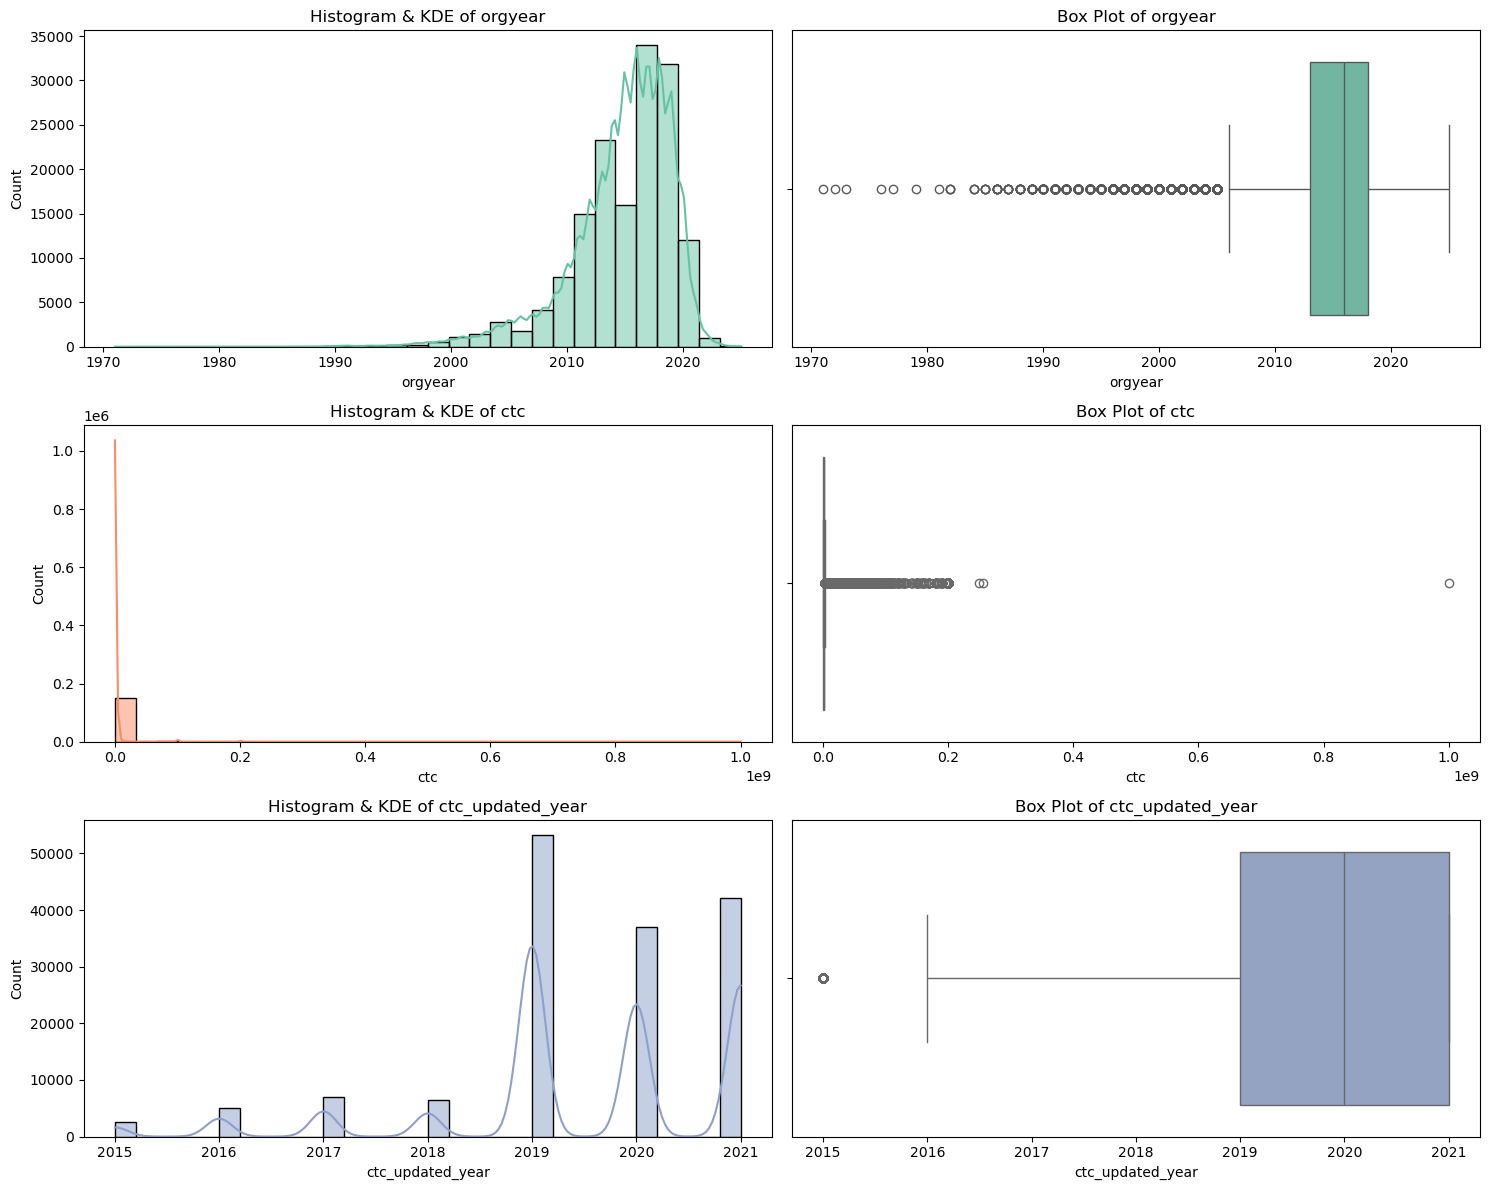

In [93]:
colors = sns.color_palette("Set2", len(cols))

plt.figure(figsize=(15, 12))
n= len(cols)
# if there are three numerical columns, total 6 positions
for i, col in enumerate(cols):
    plt.subplot(n, n-1, 2 * i + 1)
    sns.histplot(agg_df[col], kde=True, bins=30, color=colors[i])
    plt.title(f"Histogram & KDE of {col}")

    plt.subplot(n, n-1, 2 * i + 2)
    sns.boxplot(x=agg_df[col], color=colors[i])
    plt.title(f"Box Plot of {col}")

plt.tight_layout()
plt.show()

- Clearly orgyear is very bad, it is having years in it but the data is skyrocketed
- Need more analysis on orgyear
- Huge outliers in ctc column and outliers are clearly bad for any ML algorithm

In [81]:
# Clearly the data entry has been very wrong - upper boundary
agg_df[agg_df['orgyear'] > 2025]['orgyear'].value_counts() # straightforward current year

orgyear
2026.0     7
2029.0     5
2031.0     2
20165.0    2
2106.0     1
2204.0     1
2028.0     1
2027.0     1
2101.0     1
Name: count, dtype: int64

In [102]:
agg_df[agg_df['orgyear'] < 1970]['orgyear'].value_counts() # lower boundary

# trail and error, if he joined at 1971 now the person's experience will be ~54 years. which is reasonable

Series([], Name: count, dtype: int64)

In [95]:
agg_df[(agg_df['orgyear'] <= 2025) & (agg_df['orgyear'] >= 1970)]['orgyear'].describe()

count    153333.000000
mean       2014.807445
std           4.364135
min        1971.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2025.000000
Name: orgyear, dtype: float64

**Impute the `orgyear` with mean(2014) or median(2016) who entered abnormal year**

In [87]:
median_orgyear= agg_df[(agg_df['orgyear'] <= 2025) & (agg_df['orgyear'] >= 1970)]['orgyear'].median()
median_orgyear

2016.0

In [90]:
agg_df['orgyear'][(agg_df['orgyear'] > 2025) | (agg_df['orgyear'] <= 1970)] = median_orgyear

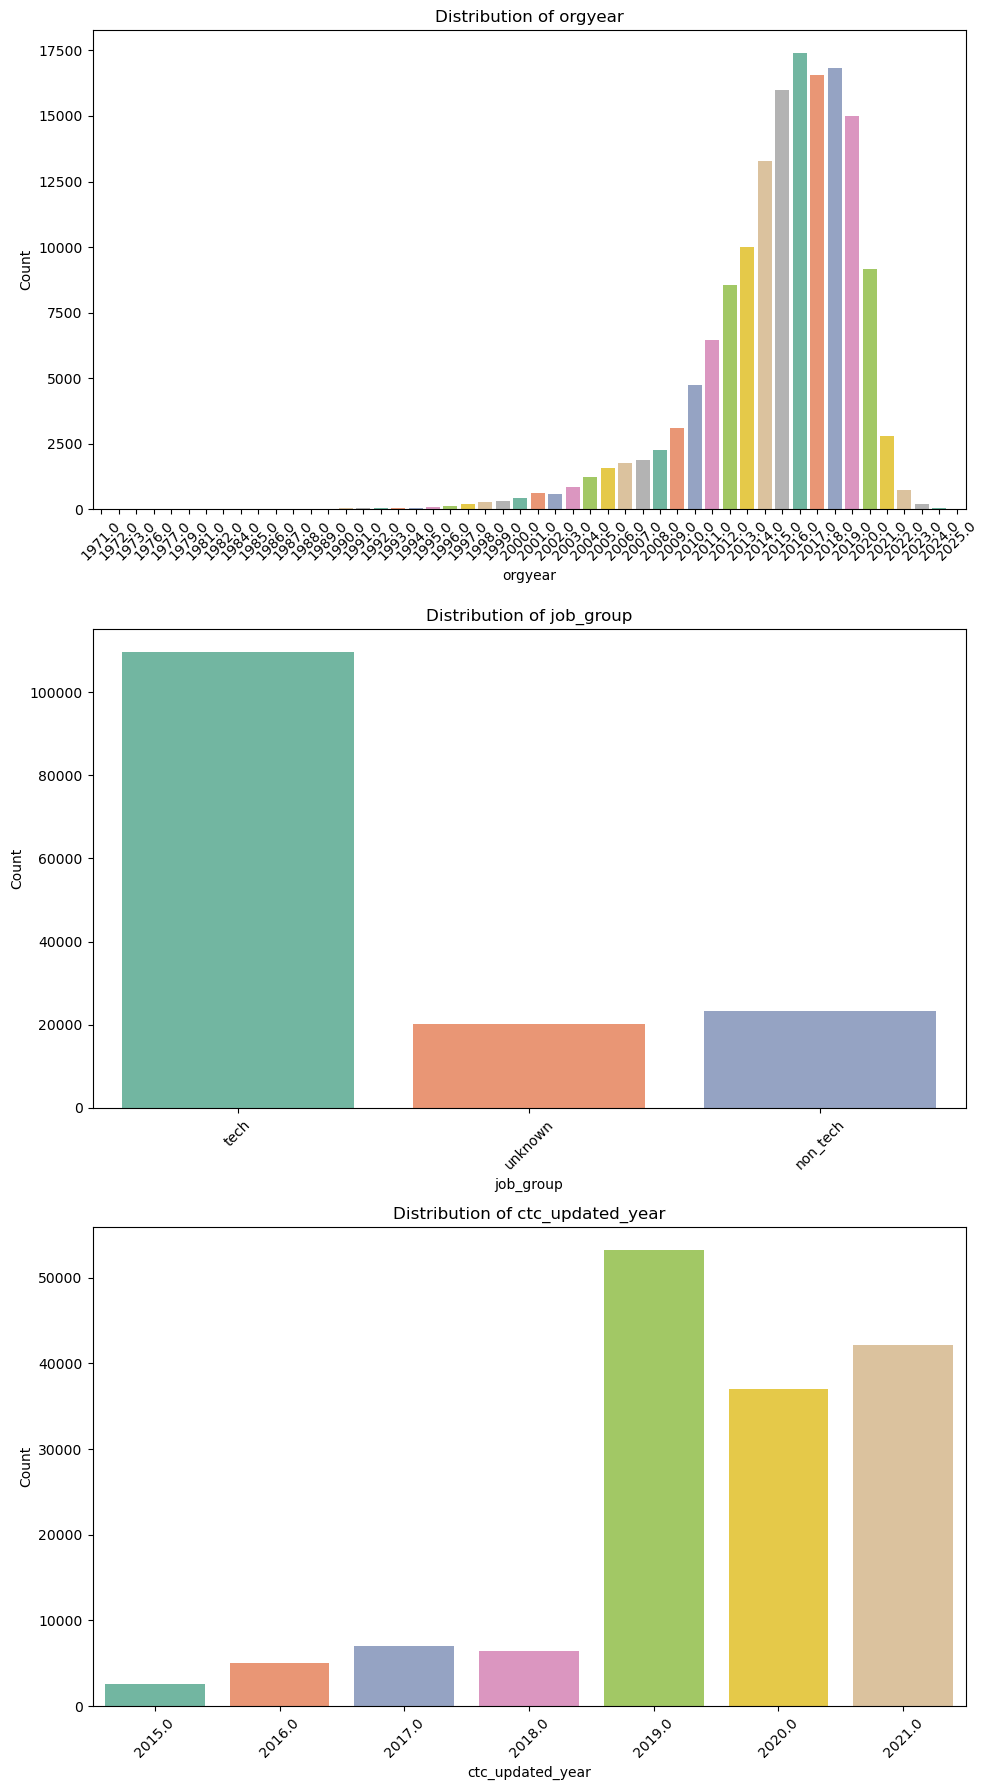

In [101]:
cat_cols= ['orgyear', 'job_group', 'ctc_updated_year']

plt.figure(figsize=(10, 18))
# for categorical data for 4 cols
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 1, i)  
    sns.countplot(x=agg_df[col], palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation= 45)
    plt.xlabel(col)
    plt.ylabel('Count')
    
plt.tight_layout()
plt.show()

#### Insights
- orgyear after cleaning abnormal years has given skewed distirbution. There are people from 1971(50 years) to 2025(1 year)
- Majority of the learners joined the company around 2016(~11) years of experience.
- Learners with tech background dominates the dataset.